# Titanic Comptetion

## 1. Introduction

### 1.1. Problem Statement

This competition revolves around a classification problem for the titanic dataset. Apparently, not everyone on the titanic ship died during the horrifying event you all know. Although it seems that people should have survived at random, there seems to have been a correlation between certain attributes of the passengers and their chance of survival!
Here are some of these attributes:

| **Attribute**  |              **Description**           | **Column in dataset**  |
|----------------|:---------------------------------------|:-----------------------|
|  Ticket class  |  Three possible classes: 1st, 2nd, 3rd |        *pclass*        |
|     Gender     |  The sex of the passenger              |         *sex*          |
|      Age       |  Age of the passenger in years         |         *age*          |
|   Siblings     |  *Number* of siblings aboard Titanic   |         *sibsp*        |
|    Parents     |  *Number* of parents aboard Titani     |         *parch*        |
|     Ticket     |  Ticket number of the passenger        |         *ticket*       |
|      Fare      |  Passenger fare                        |         *fare*         |
|      Cabin     |  Cabin number of the passenger         |         *cabin*        |
| Port of entry  |  The station at which passneger boarded|         *embarked*     |

### 1.2. Dataset

There are two ```.csv``` files to this problem which are placed in the ```./data/``` directory:

- **train.csv**: which contains the attributes in the above table along with an extra column called *survived* which indicates whether the passenger has survived or not (1 for survived and 0 for not survivied). This dataset is meant to be used for model trainig.
- **test.csv**: which contains only the attributes of the above table without the *survived* column since this dataset is meant for testing the model and the answers for it are hidden. The performance of your model on this dataset will be used to rank the model in the competition.

### 1.3. Output

The output of the model is the answers it gives for the examples provided in test.csv file. Therefore, the output is a ```.csv``` file that contains two columns:

- **PassengerID**: which is the passenger ID of the passengers in the test.csv file.
- **Survived**: which is 1 for people who survived and 0 otherwise. These values are the predictions given by the trained model.

# 2. Data Insight

## 2.1. Loading data and importing modules

First we need to import the necessary modules and packages:

- **pandas**: for data manipulation
- **np**: for array operations
- **matplotlib.pyplot**: for data visualization
- **seaborn**: for data visualization
- **scipy**: for statistical operations.

Then, we set the appropriate directories to read data from and finally we read data and load them onto a pandas dataframe.

In [1]:
# Importing required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
# Setting up the directories.
CURRENT_DIR = './'
DATA_DIR = CURRENT_DIR + 'data/'
TRAIN_FILE_NAME = 'titanic_train.csv'
TEST_FILE_NAME = 'titanic_test.csv'

In [3]:
# Loading data and print the first few rows
train_ds = pd.read_csv(DATA_DIR + TRAIN_FILE_NAME)
print(f'The dataset has {train_ds.shape[0]} data points.')
train_ds.head()

The dataset has 891 data points.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2.2 Data Analysis

Next, we need to analyze our data to understand them and gain more insight into them. This is an important step since it allows for better fabrication of the prediction model. The steps in analysis include:

- Checking for duplicate values and deciding how to manage them.
- Checking Null (or NaN) values and deciding how to manage them.
- Understanding the distribution of each attribute.
- Understanding the relationship between different attributes and the target variable (i.e., Survived).
- Understanding the relationship between input attributes to understand if there exists any redundant information in the dataset.

### 2.2.1 Duplicate value handling

Handling duplicate values is important since these values introduce a bias to the final system that makes the prediction model to give more attention to these repeated values. This in turn can cause overfitting that prevents the prediction system to generalize well to unseen data points.

Based on the tables shown above, there are two ways that we can check if a row is duplicate:

- Check by the name of the passengers
- Check by the ticket number of passengers.

In [4]:
# Checking for duplicate values among person names
duplicate_num = len(train_ds.duplicated(subset=['Name'])[train_ds.duplicated(subset=['Name'])])
if duplicate_num > 0:
    print(f'We have {duplicate_num} duplicate persons in the dataset')
else:
    print('There are no duplicate persons based on name')

There are no duplicate persons based on name


Analyzing the name of the passengers reveals that there are no duplicate rows in the dataset.

In [5]:
# Showing the duplicate values based on tickets
train_ds[train_ds.duplicated(subset=['Ticket'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


Analyzing the ticket number of passengers shows that there are multiple passengers with the same ticket number. However, the result of the next cell (for a single ticket number) shows that its because all the family members of a certain family have the similar ticket number. Therefore, we can conclude that there are now duplicate passenger information in this table, thus, no need to handle duplicate values.

In [6]:
train_ds[train_ds['Ticket'] == '382652']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,NaN,Q
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,NaN,Q
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q


### 2.2.2 Handling missing values

Now we need to address the missing values in the dataset. The next cell shows how many missing values is present for each column of our dataset.

In [7]:
for c in train_ds.columns:
    print(f'{c} column has {train_ds[c].isna().sum()} NaN values')

PassengerId column has 0 NaN values
Survived column has 0 NaN values
Pclass column has 0 NaN values
Name column has 0 NaN values
Sex column has 0 NaN values
Age column has 177 NaN values
SibSp column has 0 NaN values
Parch column has 0 NaN values
Ticket column has 0 NaN values
Fare column has 0 NaN values
Cabin column has 687 NaN values
Embarked column has 2 NaN values


From the above cell we can see that Most columns do not have missing values. From the columns that do have missing values (i.e., Age, Cabin, Embarked), *Cabin* has the most number of missing values while *Embarked* has the least number of missing values. Now we need to decide either to fill the missing values with some other value or to completely remove a certain column. Since *Cabin* column has a missing value for nearly 75% of the rows and since by our own insight, we can see that cabin number may not introduce that much information regarding whether a person was survived or not, we can decide to remove this column for now. Also, we can get rid of ticket number and name since they are also likely to introduce only a negligible amount of information to the final prediction model.

As fo *Age* and *Embarked* we can replace them by their median and mode, respectively. We choose median for *Age* since it's a numerical value and mode for *Embarked* since it is a categorical value.

In [8]:
# Replacing NaNs in Age and Embarked columns with median and most frequent values
train_ds['Age'].fillna(train_ds['Age'].median(), inplace=True)
train_ds['Embarked'].fillna(train_ds['Embarked'].mode(), inplace=True)

In [9]:
# Losing the useless columns
train_ds.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

### 2.2.3 Univariate Analysis

Now we need to analyze each column (or attribute) individually. The best way to this is to understand what is the distribution of all possible values of each attribute. We plot the distibution of *numerical* and *categorical* attibutes in separate cells.

In [10]:
CATEGORICAL = ['Sex', 'Pclass', 'Survived', 'Embarked']
NUMERICAL = ['Age', 'Parch', 'SibSp', 'Fare']

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

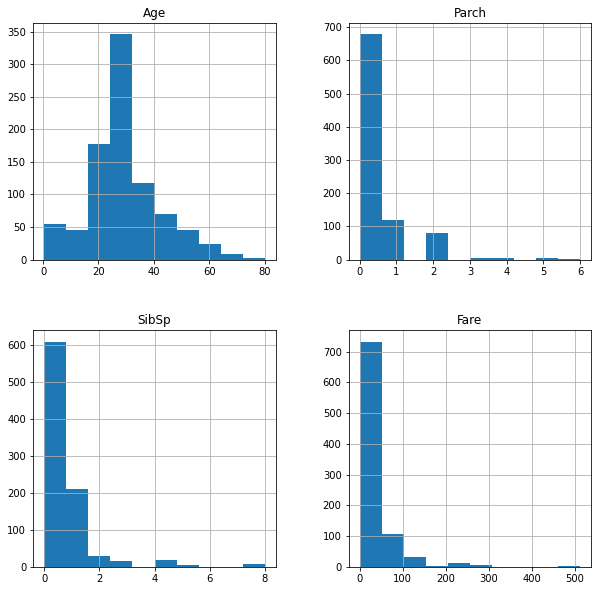

In [11]:
# Distribution of Numerical parameters
plt.rcParams.update({'font.size': 10})
train_ds.hist(column=NUMERICAL, figsize=(10.0, 10.0), grid=True)

As it can be seen from the cell above, the distribution of data over numerical attributes is fairly skewed. Since most ML models work better with normally distributed data or at least data that is zero-centered. So, this is an indication that we need to transfrom our numerical attributes before feeding them into any ML model. Also, one thing that we should note here is that for *SibSp* (or number of siblings on board), *Fare* and *Parch* (or number of parents on board), most people had a value that are very close to 0. Especially for *SibSp* and *Parch* that have discrete values, this means that had a value of 0. When the value of a certain attribute is mostly repeated at a certain value, it means that it introduces little information to the system (less entropy). Although a covariate analysis in the next sections can give a better idea whether each of these attributes introduce significant information towards our target variable (i.e., Survived).

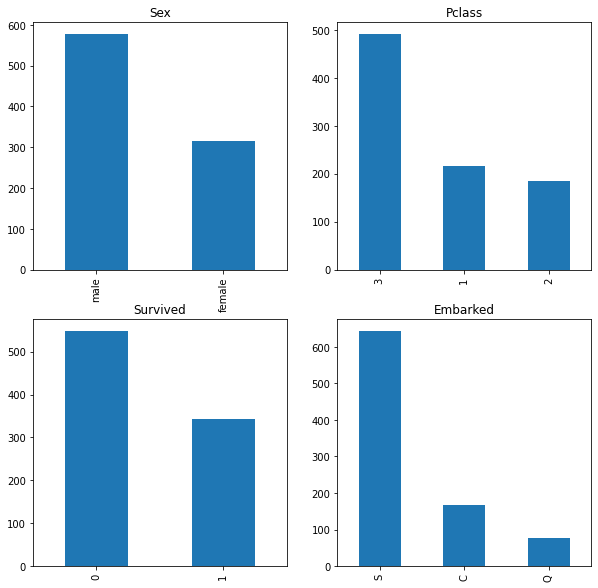

In [35]:
figure = plt.figure(figsize=(10.0, 10.0))
for c in range(len(CATEGORICAL)):
    plt.subplot(2, 2, c+1)
    train_ds[CATEGORICAL[c]].value_counts().plot(kind='bar')
    plt.title(f'{CATEGORICAL[c]}')

Finally for the categorical attribiutes we can see that the data is less unbalanced. Of course more people have died than survived and apparently there were more men on board than women. The cell above also shows that most of the people had acquired a ticket class of 3 and they mostly boarded the ship from the *s* station.

In [37]:
for c in CATEGORICAL:
    p_value = chi2_contingency(pd.crosstab(index=train_ds[c], columns=train_ds['Survived']))[1]
    if p_value < 0.05:
        print(f'Null hypithesis rejected -> Survived and {c} columns are related')
    else:
        print(f'We failed to reject the null hypothesis')

Null hypithesis rejected -> Survived and Sex columns are related
Null hypithesis rejected -> Survived and Pclass columns are related
Null hypithesis rejected -> Survived and Survived columns are related
Null hypithesis rejected -> Survived and Embarked columns are related


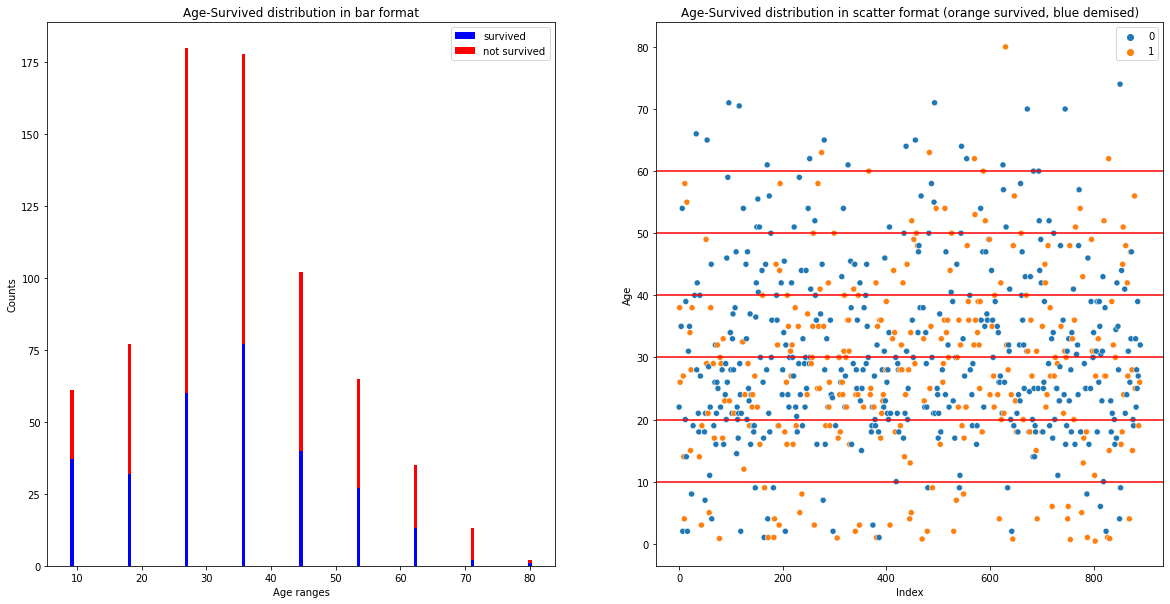

In [196]:
# A stacked bar to understand the correlation between age attribute and survived attribute
figure = plt.figure(figsize=(20.0, 10.0))

# Stacked bar representation
min_age = train_ds['Age'].min()
max_age = train_ds['Age'].max()
age_bins = np.linspace(min_age, max_age, 10)
survived = train_ds[train_ds['Survived']==1].groupby(pd.cut(train_ds['Age'], age_bins))['Age'].count()
n_survived = train_ds[train_ds['Survived']==0].groupby(pd.cut(train_ds['Age'], age_bins))['Age'].count()
plt.subplot(1,2,1)
plt.bar(age_bins[1:], survived, color='blue', width=0.5, label='survived')
plt.bar(age_bins[1:], n_survived, color='red', bottom=survived, width=0.5, label='not survived')
plt.title('Age-Survived distribution in bar format')
plt.xlabel('Age ranges')
plt.ylabel('Counts')
plt.legend()

# Scatterplot representation
plt.subplot(1,2,2)
for i in range(1, 7):
    plt.axhline(y=i*10, color='r', linestyle='-')
sns.scatterplot(data=train_ds, x=train_ds.index, y='Age', hue='Survived', legend='auto')
plt.title('Age-Survived distribution in scatter format (orange survived, blue demised)')
plt.ylabel('Age')
plt.xlabel('Index')
plt.legend()

plt.show()

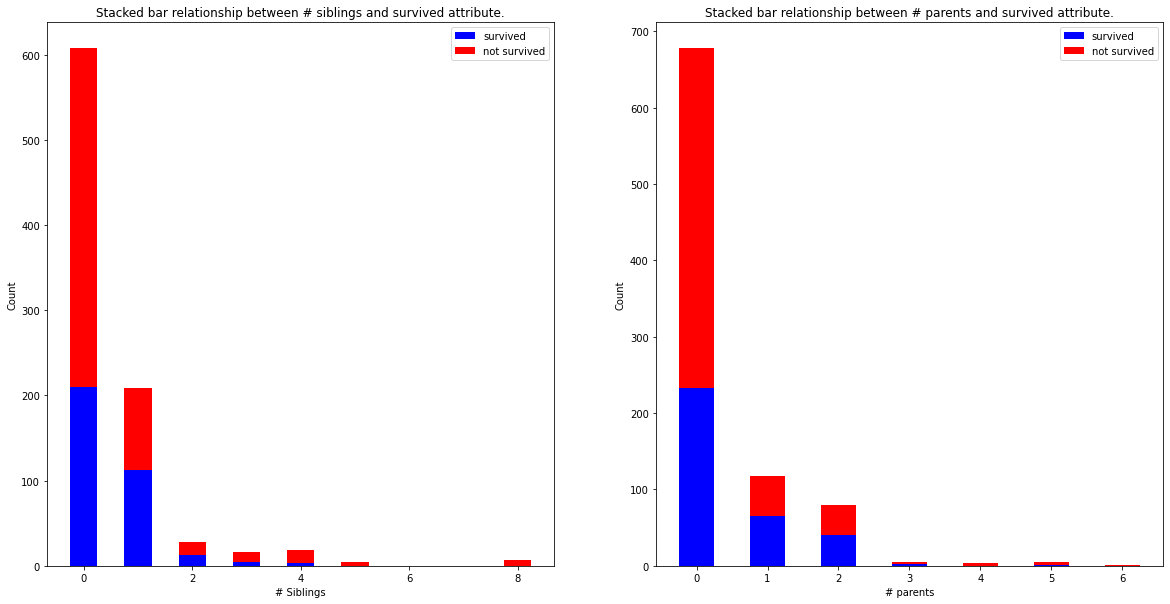

In [205]:
# Relationship between number of siblings and survived attribute.
figure = plt.figure(figsize=(20.0, 10.0))
counter = 1
for c in ['SibSp', 'Parch']:
    sib_bins = train_ds[c].unique()
    survived_counts = train_ds[train_ds['Survived']==1].groupby(c)[c].count()
    n_survived_counts = train_ds[train_ds['Survived']==0].groupby(c)[c].count()
    survived = []
    n_survived = []
    for i in sib_bins:
        if survived_counts.get(i):
            survived.append(survived_counts.get(i))
        else:
            survived.append(0)

        if n_survived_counts.get(i):
            n_survived.append(n_survived_counts.get(i))
        else:
            n_survived.append(0)
    
    plt.subplot(1, 2, counter)
    counter += 1
    
    plt.bar(sib_bins, survived, color='blue', width=0.5, label='survived')
    plt.bar(sib_bins, n_survived, color='red', bottom=survived, width=0.5, label='not survived')
    if c == 'SibSp':
        plt.title('Stacked bar relationship between # siblings and survived attribute.')
        plt.xlabel('# Siblings')
    else:
        plt.title('Stacked bar relationship between # parents and survived attribute.')
        plt.xlabel('# parents')
    plt.ylabel('Count')
    plt.legend()
plt.show()

<AxesSubplot:ylabel='Fare'>

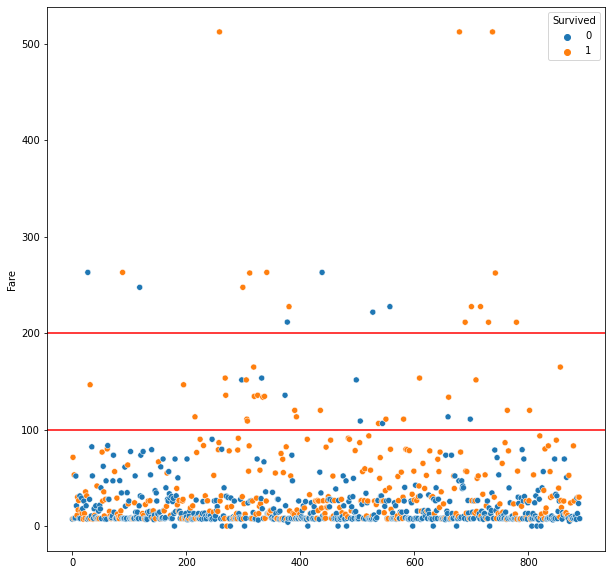

In [155]:
# plotting a scatter plot to show the dependency of fare and survived attribute
plt.figure(figsize=(10.0, 10.0))
plt.axhline(y=200, color='r', linestyle='-')
plt.axhline(y=100, color='r', linestyle='-')
sns.scatterplot(data=train_ds, x=train_ds.index, y='Fare', hue='Survived')